In [1]:
import pandas as pd
import numpy as np
import warnings
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = {'png', 'retina'}

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 30000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 1. EDA


In [2]:
df_train = pd.read_csv("./data/train.csv")
print(df_train.shape)
df_train.tail(5)

(4617600, 4)


,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [3]:
df_key = pd.read_csv("./data/key.csv")
print(df_key.shape)
df_key.tail(5)

(45, 2)


,store_nbr,station_nbr
40,41,12
41,42,14
42,43,11
43,44,12
44,45,16


## station nbr 추가

In [4]:
df_train_key = pd.merge(df_train, df_key, on='store_nbr', how='left')
print(df_train_key.shape)
df_train_key.tail(5)

(4617600, 5)


,date,store_nbr,item_nbr,units,station_nbr
4617595,2014-10-31,45,107,0,16
4617596,2014-10-31,45,108,0,16
4617597,2014-10-31,45,109,0,16
4617598,2014-10-31,45,110,0,16
4617599,2014-10-31,45,111,0,16


In [5]:
df_wal_weather = pd.read_csv("./data/weather.csv")
print(df_wal_weather.shape)
df_wal_weather.tail(5)

(20517, 20)


,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20,2014-10-31,68,50,59,M,39,50,6,0,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


In [6]:
for i in df_wal_weather.columns:
    df_wal_weather[i] = df_wal_weather[i].replace('-', np.nan)
    df_wal_weather[i] = df_wal_weather[i].replace(' ', np.nan)
    df_wal_weather[i] = df_wal_weather[i].replace('M', np.nan)

In [7]:
df_wal_weather['idx'] = df_wal_weather.index
df_wal_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,idx
20512,16,2014-10-31,53,34,44,NaN,35,41,21,0,NaN,NaN,NaN,NaN,0.00,29.90,29.99,4.5,03,5.3,20512
20513,17,2014-10-31,59,34,47,NaN,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,20513
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,NaN,0.0,0.00,29.78,30.28,10.6,36,11.2,20514
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,20515
20516,20,2014-10-31,68,50,59,NaN,39,50,6,0,NaN,NaN,NaN,0.0,0.00,29.57,30.27,10.5,36,11.2,20516


- station별로 df 분리 시도

In [8]:
#station1
df_st1 = df_wal_weather.copy()
df_st1.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 1:
        df_st1 = df_st1.drop([str(i)])

print("[station", 1, "]\n", "size : ", np.shape(df_st1))
df_st1.tail()

#station2
df_st2 = df_wal_weather.copy()
df_st2.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 2:
        df_st2 = df_st2.drop([str(i)])

print("[station", 2, "]\n", "size : ", np.shape(df_st2))
df_st2.tail()

#station3
df_st3 = df_wal_weather.copy()
df_st3.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 3:
        df_st3 = df_st3.drop([str(i)])

print("[station", 3, "]\n", "size : ", np.shape(df_st3))
df_st3.tail()

#station4
df_st4 = df_wal_weather.copy()
df_st4.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 4:
        df_st4 = df_st4.drop([str(i)])

print("[station", 4, "]\n", "size : ", np.shape(df_st4))
df_st4.tail()

#station5
df_st5 = df_wal_weather.copy()
df_st5.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 5:
        df_st5 = df_st5.drop([str(i)])

print("[station", 5, "]\n", "size : ", np.shape(df_st5))
df_st5.tail()

#station6
df_st6 = df_wal_weather.copy()
df_st6.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 6:
        df_st6 = df_st6.drop([str(i)])

print("[station", 6, "]\n", "size : ", np.shape(df_st6))
df_st6.tail()

#station7
df_st7 = df_wal_weather.copy()
df_st7.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 7:
        df_st7 = df_st7.drop([str(i)])

print("[station", 7, "]\n", "size : ", np.shape(df_st7))
df_st7.tail()

#station8
df_st8 = df_wal_weather.copy()
df_st8.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 8:
        df_st8 = df_st8.drop([str(i)])

print("[station", 8, "]\n", "size : ", np.shape(df_st8))
df_st8.tail()

#station9
df_st9 = df_wal_weather.copy()
df_st9.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 9:
        df_st9 = df_st9.drop([str(i)])

print("[station", 9, "]\n", "size : ", np.shape(df_st9))
df_st9.tail()

#station10
df_st10 = df_wal_weather.copy()
df_st10.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 10:
        df_st10 = df_st10.drop([str(i)])

print("[station", 10, "]\n", "size : ", np.shape(df_st10))
df_st10.tail()

#station11
df_st11 = df_wal_weather.copy()
df_st11.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 11:
        df_st11 = df_st11.drop([str(i)])

print("[station", 11, "]\n", "size : ", np.shape(df_st11))
df_st11.tail()

#station12
df_st12 = df_wal_weather.copy()
df_st12.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 12:
        df_st12 = df_st12.drop([str(i)])

print("[station", 12, "]\n", "size : ", np.shape(df_st12))
df_st12.tail()

#station13
df_st13 = df_wal_weather.copy()
df_st13.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 13:
        df_st13 = df_st13.drop([str(i)])

print("[station", 13, "]\n", "size : ", np.shape(df_st13))
df_st13.tail()

#station14
df_st14 = df_wal_weather.copy()
df_st14.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 14:
        df_st14 = df_st14.drop([str(i)])

print("[station", 14, "]\n", "size : ", np.shape(df_st14))
df_st14.tail()

#station15
df_st15 = df_wal_weather.copy()
df_st15.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 15:
        df_st15 = df_st15.drop([str(i)])

print("[station", 15, "]\n", "size : ", np.shape(df_st15))
df_st15.tail()

#station16
df_st16 = df_wal_weather.copy()
df_st16.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 16:
        df_st16 = df_st16.drop([str(i)])

print("[station", 16, "]\n", "size : ", np.shape(df_st16))
df_st16.tail()

#station17
df_st17 = df_wal_weather.copy()
df_st17.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 17:
        df_st17 = df_st17.drop([str(i)])

print("[station", 17, "]\n", "size : ", np.shape(df_st17))
df_st17.tail()

#station18
df_st18 = df_wal_weather.copy()
df_st18.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 18:
        df_st18 = df_st18.drop([str(i)])

print("[station", 18, "]\n", "size : ", np.shape(df_st18))
df_st18.tail()

#station19
df_st19 = df_wal_weather.copy()
df_st19.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 19:
        df_st19 = df_st19.drop([str(i)])

print("[station", 19, "]\n", "size : ", np.shape(df_st19))
df_st19.tail()

#station20
df_st20 = df_wal_weather.copy()
df_st20.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 20:
        df_st20 = df_st20.drop([str(i)])

print("[station", 20, "]\n", "size : ", np.shape(df_st20))
df_st20.tail()

[station 1 ]
 size :  (1035, 20)
[station 2 ]
 size :  (1035, 20)
[station 3 ]
 size :  (1035, 20)
[station 4 ]
 size :  (1035, 20)
[station 5 ]
 size :  (852, 20)
[station 6 ]
 size :  (1035, 20)
[station 7 ]
 size :  (1035, 20)
[station 8 ]
 size :  (1035, 20)
[station 9 ]
 size :  (1035, 20)
[station 10 ]
 size :  (1035, 20)
[station 11 ]
 size :  (1035, 20)
[station 12 ]
 size :  (1035, 20)
[station 13 ]
 size :  (1035, 20)
[station 14 ]
 size :  (1035, 20)
[station 15 ]
 size :  (1035, 20)
[station 16 ]
 size :  (1035, 20)
[station 17 ]
 size :  (1035, 20)
[station 18 ]
 size :  (1035, 20)
[station 19 ]
 size :  (1035, 20)
[station 20 ]
 size :  (1035, 20)


,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,idx
station_nbr,,,,,,,,,,,,,,,,,,,,
20,2014-10-27,85,66,76,NaN,59,65,0,11,NaN,NaN,NaN,0.0,0.00,29.11,29.82,10.0,18,10.4,20436
20,2014-10-28,80,68,74,NaN,60,65,0,9,NaN,NaN,NaN,0.0,0.00,29.30,29.97,3.1,36,6.4,20456
20,2014-10-29,78,55,67,NaN,47,56,0,2,NaN,NaN,NaN,0.0,0.00,29.42,30.12,4.9,06,6.1,20476
20,2014-10-30,80,52,66,NaN,50,57,0,1,NaN,NaN,NaN,0.0,0.00,29.40,30.11,1.6,14,4.9,20496
20,2014-10-31,68,50,59,NaN,39,50,6,0,NaN,NaN,NaN,0.0,0.00,29.57,30.27,10.5,36,11.2,20516


## Missing data

In [9]:
#missingdata 찾기
def graph_na(data_train):
    plt.figure()
    missing_data_count = data_train.isnull().sum()
    missing_data_count.sort_values(ascending = False, inplace = True)
    missing_data_count_filtered = missing_data_count[missing_data_count > 0]
    missing_data_count_filtered.plot(kind = 'bar', title = 'missing data count')
    plt.show()

In [10]:
li = []
li.append(df_st1)
li.append(df_st2)
li.append(df_st3)
li.append(df_st4)
li.append(df_st5)
li.append(df_st6)
li.append(df_st7)
li.append(df_st8)
li.append(df_st9)
li.append(df_st10)
li.append(df_st11)
li.append(df_st12)
li.append(df_st13)
li.append(df_st14)
li.append(df_st15)
li.append(df_st16)
li.append(df_st17)
li.append(df_st18)
li.append(df_st19)
li.append(df_st20)

In [11]:
len(li)

20

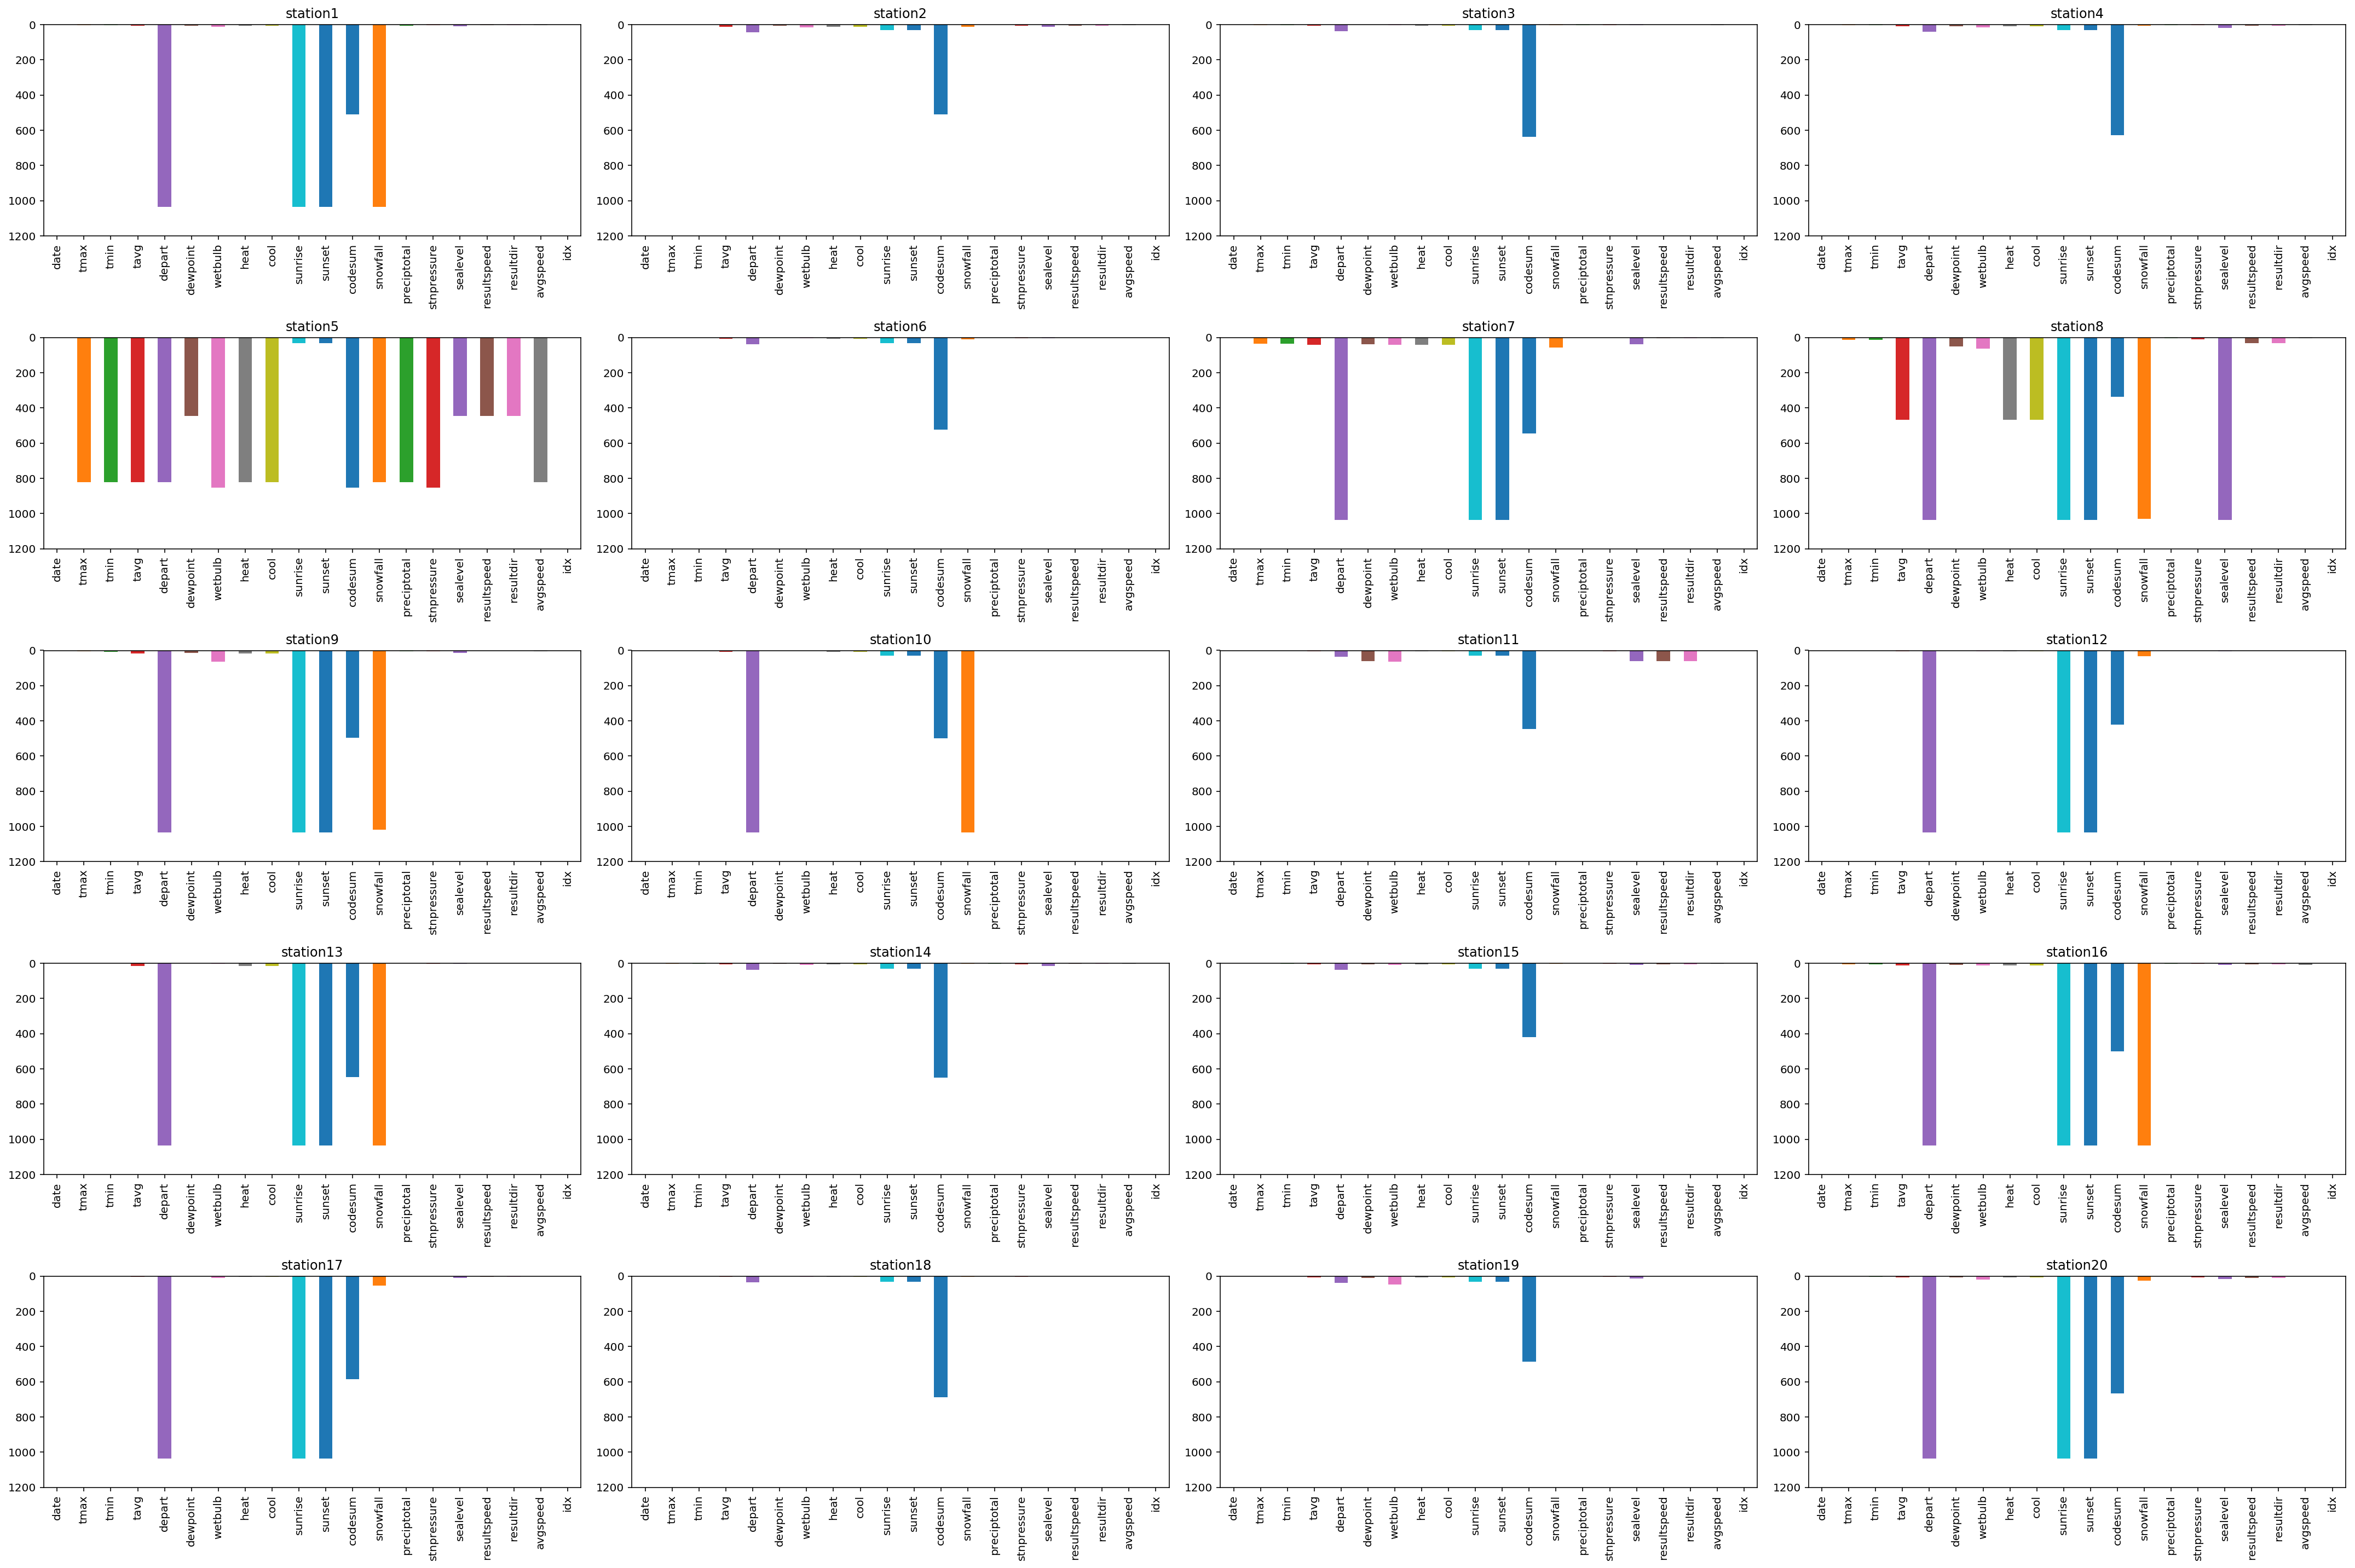

In [12]:
fig = plt.figure(figsize=(30,20))
for i in range(0,20):
    plt.subplot(5, 4, i+1)
    plt.title("station" + str(i+1))
    plt.ylim(1200)
    missing_data_count = li[i].isnull().sum()
#     missing_data_count.sort_values(ascending = False, inplace = True)
#     missing_data_count_filtered = missing_data_count[missing_data_count > 0]
    missing_data_count.plot(kind = 'bar')
plt.tight_layout()
plt.show()

### weather data column 탐색 (모든 station에 공통적으로 적용)
- ['station_nbr'] : 변화 없음

- ['date'] : 년/월/일을 새로 추가해준다

In [13]:
def MakeYear(x):
    A = re.search(r'\d\d\d\d', str(x))
    return A.group()

def MakeMonth(x):
    A = re.search(r'-\d\d-', str(x))
    B = re.search(r'\d\d', str(A))
    return B.group()

def MakeDay(x):
    A = re.search(r'(-\d\d)-(\d\d)', str(x))
    return A.group(2)

In [14]:
df_wal_weather['year'] = df_wal_weather['date'].apply(MakeYear)
df_wal_weather['year'].unique()

array(['2012', '2013', '2014'], dtype=object)

In [15]:
df_wal_weather['month'] = df_wal_weather['date'].apply(MakeMonth)
df_wal_weather['month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [16]:
df_wal_weather['day'] = df_wal_weather['date'].apply(MakeDay)
df_wal_weather['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

- 요일도 추가한다
- Python starts with 0 = Monday.

In [17]:
def Integerize(x):
    x = int(x)
    return x

In [18]:
df_wal_weather['year'] = df_wal_weather['year'].apply(Integerize)
df_wal_weather['month'] = df_wal_weather['month'].apply(Integerize)
df_wal_weather['day'] = df_wal_weather['day'].apply(Integerize)

In [19]:
import datetime


weekday = list()
for i in range(len(df_wal_weather)):
    weekday.append(datetime.datetime(df_wal_weather['year'][i], df_wal_weather['month'][i], df_wal_weather['day'][i]).weekday())

In [20]:
df_wal_weather['weekday'] = weekday

In [21]:
df_wal_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,idx,year,month,day,weekday
20512,16,2014-10-31,53,34,44,NaN,35,41,21,0,NaN,NaN,NaN,NaN,0.00,29.90,29.99,4.5,03,5.3,20512,2014,10,31,4
20513,17,2014-10-31,59,34,47,NaN,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,20513,2014,10,31,4
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,NaN,0.0,0.00,29.78,30.28,10.6,36,11.2,20514,2014,10,31,4
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,20515,2014,10,31,4
20516,20,2014-10-31,68,50,59,NaN,39,50,6,0,NaN,NaN,NaN,0.0,0.00,29.57,30.27,10.5,36,11.2,20516,2014,10,31,4


- temperature

In [22]:
type(df_wal_weather['tmax'][0])

str

In [23]:
def Floaterize(x):
    x = float(x)
    return x

In [24]:
df_wal_weather['tmax'] = df_wal_weather['tmax'].apply(Floaterize)
df_wal_weather['tmin'] = df_wal_weather['tmin'].apply(Floaterize)
df_wal_weather['tavg'] = df_wal_weather['tavg'].apply(Floaterize)
df_wal_weather['depart'] = df_wal_weather['depart'].apply(Floaterize)

In [25]:
type(df_wal_weather['tmax'][0])

numpy.float64

In [26]:
#station1
df_st1 = df_wal_weather.copy()
df_st1.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 1:
        df_st1 = df_st1.drop([str(i)])

print("[station", 1, "]\n", "size : ", np.shape(df_st1))
df_st1.tail()

#station2
df_st2 = df_wal_weather.copy()
df_st2.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 2:
        df_st2 = df_st2.drop([str(i)])

print("[station", 2, "]\n", "size : ", np.shape(df_st2))
df_st2.tail()

#station3
df_st3 = df_wal_weather.copy()
df_st3.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 3:
        df_st3 = df_st3.drop([str(i)])

print("[station", 3, "]\n", "size : ", np.shape(df_st3))
df_st3.tail()

#station4
df_st4 = df_wal_weather.copy()
df_st4.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 4:
        df_st4 = df_st4.drop([str(i)])

print("[station", 4, "]\n", "size : ", np.shape(df_st4))
df_st4.tail()

#station5
df_st5 = df_wal_weather.copy()
df_st5.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 5:
        df_st5 = df_st5.drop([str(i)])

print("[station", 5, "]\n", "size : ", np.shape(df_st5))
df_st5.tail()

#station6
df_st6 = df_wal_weather.copy()
df_st6.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 6:
        df_st6 = df_st6.drop([str(i)])

print("[station", 6, "]\n", "size : ", np.shape(df_st6))
df_st6.tail()

#station7
df_st7 = df_wal_weather.copy()
df_st7.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 7:
        df_st7 = df_st7.drop([str(i)])

print("[station", 7, "]\n", "size : ", np.shape(df_st7))
df_st7.tail()

#station8
df_st8 = df_wal_weather.copy()
df_st8.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 8:
        df_st8 = df_st8.drop([str(i)])

print("[station", 8, "]\n", "size : ", np.shape(df_st8))
df_st8.tail()

#station9
df_st9 = df_wal_weather.copy()
df_st9.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 9:
        df_st9 = df_st9.drop([str(i)])

print("[station", 9, "]\n", "size : ", np.shape(df_st9))
df_st9.tail()

#station10
df_st10 = df_wal_weather.copy()
df_st10.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 10:
        df_st10 = df_st10.drop([str(i)])

print("[station", 10, "]\n", "size : ", np.shape(df_st10))
df_st10.tail()

#station11
df_st11 = df_wal_weather.copy()
df_st11.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 11:
        df_st11 = df_st11.drop([str(i)])

print("[station", 11, "]\n", "size : ", np.shape(df_st11))
df_st11.tail()

#station12
df_st12 = df_wal_weather.copy()
df_st12.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 12:
        df_st12 = df_st12.drop([str(i)])

print("[station", 12, "]\n", "size : ", np.shape(df_st12))
df_st12.tail()

#station13
df_st13 = df_wal_weather.copy()
df_st13.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 13:
        df_st13 = df_st13.drop([str(i)])

print("[station", 13, "]\n", "size : ", np.shape(df_st13))
df_st13.tail()

#station14
df_st14 = df_wal_weather.copy()
df_st14.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 14:
        df_st14 = df_st14.drop([str(i)])

print("[station", 14, "]\n", "size : ", np.shape(df_st14))
df_st14.tail()

#station15
df_st15 = df_wal_weather.copy()
df_st15.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 15:
        df_st15 = df_st15.drop([str(i)])

print("[station", 15, "]\n", "size : ", np.shape(df_st15))
df_st15.tail()

#station16
df_st16 = df_wal_weather.copy()
df_st16.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 16:
        df_st16 = df_st16.drop([str(i)])

print("[station", 16, "]\n", "size : ", np.shape(df_st16))
df_st16.tail()

#station17
df_st17 = df_wal_weather.copy()
df_st17.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 17:
        df_st17 = df_st17.drop([str(i)])

print("[station", 17, "]\n", "size : ", np.shape(df_st17))
df_st17.tail()

#station18
df_st18 = df_wal_weather.copy()
df_st18.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 18:
        df_st18 = df_st18.drop([str(i)])

print("[station", 18, "]\n", "size : ", np.shape(df_st18))
df_st18.tail()

#station19
df_st19 = df_wal_weather.copy()
df_st19.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 19:
        df_st19 = df_st19.drop([str(i)])

print("[station", 19, "]\n", "size : ", np.shape(df_st19))
df_st19.tail()

#station20
df_st20 = df_wal_weather.copy()
df_st20.set_index('station_nbr', inplace=True)
for i in range(1,21):
    if i != 20:
        df_st20 = df_st20.drop([str(i)])

print("[station", 20, "]\n", "size : ", np.shape(df_st20))
df_st20.tail()

[station 1 ]
 size :  (1035, 24)
[station 2 ]
 size :  (1035, 24)
[station 3 ]
 size :  (1035, 24)
[station 4 ]
 size :  (1035, 24)
[station 5 ]
 size :  (852, 24)
[station 6 ]
 size :  (1035, 24)
[station 7 ]
 size :  (1035, 24)
[station 8 ]
 size :  (1035, 24)
[station 9 ]
 size :  (1035, 24)
[station 10 ]
 size :  (1035, 24)
[station 11 ]
 size :  (1035, 24)
[station 12 ]
 size :  (1035, 24)
[station 13 ]
 size :  (1035, 24)
[station 14 ]
 size :  (1035, 24)
[station 15 ]
 size :  (1035, 24)
[station 16 ]
 size :  (1035, 24)
[station 17 ]
 size :  (1035, 24)
[station 18 ]
 size :  (1035, 24)
[station 19 ]
 size :  (1035, 24)
[station 20 ]
 size :  (1035, 24)


,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,idx,year,month,day,weekday
station_nbr,,,,,,,,,,,,,,,,,,,,,,,,
20,2014-10-27,85.0,66.0,76.0,NaN,59,65,0,11,NaN,NaN,NaN,0.0,0.00,29.11,29.82,10.0,18,10.4,20436,2014,10,27,0
20,2014-10-28,80.0,68.0,74.0,NaN,60,65,0,9,NaN,NaN,NaN,0.0,0.00,29.30,29.97,3.1,36,6.4,20456,2014,10,28,1
20,2014-10-29,78.0,55.0,67.0,NaN,47,56,0,2,NaN,NaN,NaN,0.0,0.00,29.42,30.12,4.9,06,6.1,20476,2014,10,29,2
20,2014-10-30,80.0,52.0,66.0,NaN,50,57,0,1,NaN,NaN,NaN,0.0,0.00,29.40,30.11,1.6,14,4.9,20496,2014,10,30,3
20,2014-10-31,68.0,50.0,59.0,NaN,39,50,6,0,NaN,NaN,NaN,0.0,0.00,29.57,30.27,10.5,36,11.2,20516,2014,10,31,4


In [48]:
df_st2.describe()

,tmax,tmin,tavg,depart,idx,year,month,day,weekday
count,1034.000000,1034.000000,1023.000000,992.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,57.823985,41.486460,50.012708,1.926411,10187.026087,2012.940097,6.228019,15.731401,2.998068
std,18.954165,17.434216,17.999044,7.449773,5947.823351,0.802731,3.322770,8.805294,2.000966
min,9.000000,-4.000000,3.000000,-18.000000,1.000000,2012.000000,1.000000,1.000000,0.000000
25%,42.000000,29.000000,35.000000,-3.000000,5019.000000,2012.000000,3.000000,8.000000,1.000000
50%,61.000000,43.000000,53.000000,2.000000,10189.000000,2013.000000,6.000000,16.000000,3.000000
75%,74.000000,56.000000,65.000000,7.000000,15328.000000,2014.000000,9.000000,23.000000,5.000000
max,93.000000,74.000000,84.000000,31.000000,20498.000000,2014.000000,12.000000,31.000000,6.000000


In [50]:
import statsmodels.api as sm

In [55]:
model = sm.OLS.from_formula("depart ~ tmax + tmin + tavg", data=df_st2)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 depart   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     68.65
Date:                Wed, 04 Apr 2018   Prob (F-statistic):           2.50e-40
Time:                        16:12:32   Log-Likelihood:                -3305.3
No. Observations:                 992   AIC:                             6619.
Df Residuals:                     988   BIC:                             6638.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.8832      0.839    -10.591      0.0

In [56]:
df_st2_t = df_st2.copy()

In [60]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
temp_imp = imp.fit_transform(df_st2_t.iloc[:, [1,2,3,4]])
df_temp_imp_st2 = pd.DataFrame(temp_imp, columns=["tmax_imp", "tmin_imp", "tavg_imp", "depart_imp"])

In [66]:
df_temp_imp_st2.tail()

,tmax_imp,tmin_imp,tavg_imp,depart_imp
1030,57.0,41.0,49.0,3.0
1031,66.0,42.0,54.0,8.0
1032,69.0,44.0,57.0,12.0
1033,52.0,39.0,46.0,1.0
1034,49.0,40.0,45.0,0.0


In [70]:
model = sm.OLS.from_formula("depart_imp ~ tmax_imp + tmin_imp + tavg_imp", data=df_temp_imp_st2)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:             depart_imp   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     63.76
Date:                Wed, 04 Apr 2018   Prob (F-statistic):           8.12e-38
Time:                        16:19:21   Log-Likelihood:                -3436.5
No. Observations:                1035   AIC:                             6881.
Df Residuals:                    1031   BIC:                             6901.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.6214      0.767     -9.933      0.0

In [41]:
temp_imp1[:5]

array([[52., 31., 42.],
       [50., 31., 41.],
       [32., 11., 22.],
       [28.,  9., 19.],
       [38., 25., 32.]])

In [45]:
df_temp_imp1 = pd.DataFrame(temp_imp1, columns=["tmax_imp", "tmin_imp", "tavg_imp", "depart_imp"])
df_temp_imp1.tail()

ValueError: Shape of passed values is (3, 1035), indices imply (4, 1035)

In [31]:
df_temp_imp.describe()

,tmax_imp,tmin_imp,tavg_imp,depart_imp
count,20517.000000,20517.000000,20517.000000,20517.000000
mean,71.621131,50.654546,61.240130,1.363091
std,19.404265,18.710733,18.494412,5.066090
min,-11.000000,-21.000000,-16.000000,-35.000000
25%,61.000000,37.000000,50.000000,1.363091
50%,74.000000,52.000000,62.000000,1.363091
75%,86.000000,66.000000,76.000000,1.363091
max,114.000000,88.000000,100.000000,33.000000


In [32]:
df_wal_weather['idx'] = df_wal_weather.index
df_wal_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,weekday,idx
20512,16,2014-10-31,53.0,34.0,44.0,NaN,35,41,21,0,NaN,NaN,NaN,NaN,0.00,29.90,29.99,4.5,03,5.3,2014,10,31,4,20512
20513,17,2014-10-31,59.0,34.0,47.0,NaN,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,2014,10,31,4,20513
20514,18,2014-10-31,67.0,49.0,58.0,-4.0,40,50,7,0,0644,1738,NaN,0.0,0.00,29.78,30.28,10.6,36,11.2,2014,10,31,4,20514
20515,19,2014-10-31,45.0,33.0,39.0,-6.0,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,2014,10,31,4,20515
20516,20,2014-10-31,68.0,50.0,59.0,NaN,39,50,6,0,NaN,NaN,NaN,0.0,0.00,29.57,30.27,10.5,36,11.2,2014,10,31,4,20516


In [33]:
df_temp_imp['idx'] = df_wal_weather.index
df_temp_imp.tail()

,tmax_imp,tmin_imp,tavg_imp,depart_imp,idx
20512,53.0,34.0,44.0,1.363091,20512
20513,59.0,34.0,47.0,1.363091,20513
20514,67.0,49.0,58.0,-4.000000,20514
20515,45.0,33.0,39.0,-6.000000,20515
20516,68.0,50.0,59.0,1.363091,20516


In [34]:
df_wal_weather = pd.merge(df_wal_weather, df_temp_imp, on='idx', how='left')
df_wal_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,weekday,idx,tmax_imp,tmin_imp,tavg_imp,depart_imp
20512,16,2014-10-31,53.0,34.0,44.0,NaN,35,41,21,0,NaN,NaN,NaN,NaN,0.00,29.90,29.99,4.5,03,5.3,2014,10,31,4,20512,53.0,34.0,44.0,1.363091
20513,17,2014-10-31,59.0,34.0,47.0,NaN,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,2014,10,31,4,20513,59.0,34.0,47.0,1.363091
20514,18,2014-10-31,67.0,49.0,58.0,-4.0,40,50,7,0,0644,1738,NaN,0.0,0.00,29.78,30.28,10.6,36,11.2,2014,10,31,4,20514,67.0,49.0,58.0,-4.000000
20515,19,2014-10-31,45.0,33.0,39.0,-6.0,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,2014,10,31,4,20515,45.0,33.0,39.0,-6.000000
20516,20,2014-10-31,68.0,50.0,59.0,NaN,39,50,6,0,NaN,NaN,NaN,0.0,0.00,29.57,30.27,10.5,36,11.2,2014,10,31,4,20516,68.0,50.0,59.0,1.363091


In [35]:
cols = df_wal_weather.columns.tolist()
cols

['station_nbr',
 'date',
 'tmax',
 'tmin',
 'tavg',
 'depart',
 'dewpoint',
 'wetbulb',
 'heat',
 'cool',
 'sunrise',
 'sunset',
 'codesum',
 'snowfall',
 'preciptotal',
 'stnpressure',
 'sealevel',
 'resultspeed',
 'resultdir',
 'avgspeed',
 'year',
 'month',
 'day',
 'weekday',
 'idx',
 'tmax_imp',
 'tmin_imp',
 'tavg_imp',
 'depart_imp']

In [36]:
cols = ['idx', 
 'station_nbr',
 'date',
 'year',
 'month',
 'day',
 'weekday',
 'tmax_imp',
 'tmin_imp',
 'tavg_imp',
 'depart_imp',
 'dewpoint',
 'wetbulb',
 'heat',
 'cool',
 'sunrise',
 'sunset',
 'codesum',
 'snowfall',
 'preciptotal',
 'stnpressure',
 'sealevel',
 'resultspeed',
 'resultdir',
 'avgspeed'
 ]

In [37]:
df_wal_weather = df_wal_weather[cols]
df_wal_weather.tail()

,idx,station_nbr,date,year,month,day,weekday,tmax_imp,tmin_imp,tavg_imp,depart_imp,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,20512,16,2014-10-31,2014,10,31,4,53.0,34.0,44.0,1.363091,35,41,21,0,NaN,NaN,NaN,NaN,0.00,29.90,29.99,4.5,03,5.3
20513,20513,17,2014-10-31,2014,10,31,4,59.0,34.0,47.0,1.363091,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,20514,18,2014-10-31,2014,10,31,4,67.0,49.0,58.0,-4.000000,40,50,7,0,0644,1738,NaN,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,20515,19,2014-10-31,2014,10,31,4,45.0,33.0,39.0,-6.000000,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20516,20,2014-10-31,2014,10,31,4,68.0,50.0,59.0,1.363091,39,50,6,0,NaN,NaN,NaN,0.0,0.00,29.57,30.27,10.5,36,11.2


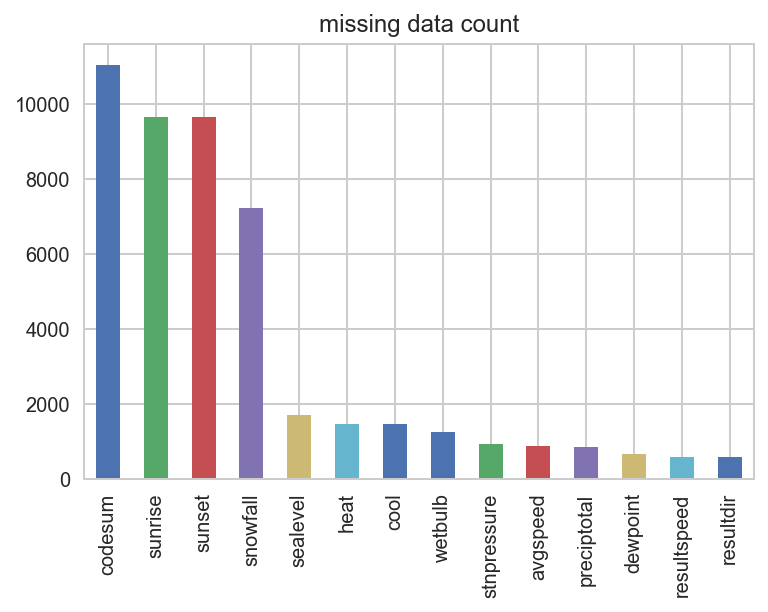

In [38]:
graph_na(df_wal_weather)

- codesum

In [39]:
df_wal_weather['codesum'] = df_wal_weather['codesum'].fillna('moderate')
df_wal_weather.tail()

,idx,station_nbr,date,year,month,day,weekday,tmax_imp,tmin_imp,tavg_imp,depart_imp,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,20512,16,2014-10-31,2014,10,31,4,53.0,34.0,44.0,1.363091,35,41,21,0,NaN,NaN,moderate,NaN,0.00,29.90,29.99,4.5,03,5.3
20513,20513,17,2014-10-31,2014,10,31,4,59.0,34.0,47.0,1.363091,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,20514,18,2014-10-31,2014,10,31,4,67.0,49.0,58.0,-4.000000,40,50,7,0,0644,1738,moderate,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,20515,19,2014-10-31,2014,10,31,4,45.0,33.0,39.0,-6.000000,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20516,20,2014-10-31,2014,10,31,4,68.0,50.0,59.0,1.363091,39,50,6,0,NaN,NaN,moderate,0.0,0.00,29.57,30.27,10.5,36,11.2


In [40]:
len(df_wal_weather['codesum'].unique())

449

In [41]:
code_list = df_wal_weather['codesum'].tolist()

In [42]:
df_wal_weather.head(14)

,idx,station_nbr,date,year,month,day,weekday,tmax_imp,tmin_imp,tavg_imp,depart_imp,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,0,1,2012-01-01,2012,1,1,6,52.0,31.0,42.00000,1.363091,36,40,23,0,NaN,NaN,RA FZFG BR,NaN,0.05,29.78,29.92,3.6,20,4.6
1,1,2,2012-01-01,2012,1,1,6,48.0,33.0,41.00000,16.000000,37,39,24,0,0716,1626,RA,0.0,0.07,28.82,29.91,9.1,23,11.3
2,2,3,2012-01-01,2012,1,1,6,55.0,34.0,45.00000,9.000000,24,36,20,0,0735,1720,moderate,0.0,0.00,29.77,30.47,9.9,31,10.0
3,3,4,2012-01-01,2012,1,1,6,63.0,47.0,55.00000,4.000000,28,43,10,0,0728,1742,moderate,0.0,0.00,29.79,30.48,8.0,35,8.2
4,4,6,2012-01-01,2012,1,1,6,63.0,34.0,49.00000,0.000000,31,43,16,0,0727,1742,moderate,0.0,0.00,29.95,30.47,14.0,36,13.8
5,5,7,2012-01-01,2012,1,1,6,50.0,33.0,42.00000,1.363091,26,35,23,0,NaN,NaN,moderate,0.0,0.00,29.15,30.54,10.3,32,10.2
6,6,8,2012-01-01,2012,1,1,6,66.0,45.0,61.24013,1.363091,34,46,NaN,NaN,NaN,NaN,RA BR,NaN,0.00,30.05,NaN,11.0,36,10.9
7,7,9,2012-01-01,2012,1,1,6,34.0,19.0,27.00000,1.363091,17,23,38,0,NaN,NaN,UP,NaN,T,29.34,30.09,22.8,30,22.5
8,8,10,2012-01-01,2012,1,1,6,73.0,53.0,63.00000,1.363091,55,58,2,0,0723,1738,FG+ FG BR,NaN,0.00,30.16,30.19,5.1,24,5.5
9,9,11,2012-01-01,2012,1,1,6,72.0,48.0,60.00000,7.000000,54,56,5,0,0724,1737,FG+ FG BR,0.0,0.00,30.15,30.18,4.6,23,4.8


- +앞에 오는 글자가 FG말고 다른게 있는지 확인

In [43]:
import re

for idx, i in enumerate(code_list):
#     print(idx)
    if '+' in i:
        A = re.search(r'(\w\w\+)', i)
        if A.group() != 'FG+':
            print(A.group())
    else:
        pass

- 아무것도 없으므로 +표기된 것은 heavy fog를 뜻함. 열 추가.

In [44]:
for idx, i in enumerate(code_list):
    if '+' in i:
        if '+' in i:
            code_list[idx] = 1
    else:
        code_list[idx] = 0

In [45]:
code_list[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

In [46]:
df_wal_weather['heavy_fog'] = code_list
df_wal_weather.tail()

,idx,station_nbr,date,year,month,day,weekday,tmax_imp,tmin_imp,tavg_imp,depart_imp,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,heavy_fog
20512,20512,16,2014-10-31,2014,10,31,4,53.0,34.0,44.0,1.363091,35,41,21,0,NaN,NaN,moderate,NaN,0.00,29.90,29.99,4.5,03,5.3,0
20513,20513,17,2014-10-31,2014,10,31,4,59.0,34.0,47.0,1.363091,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,0
20514,20514,18,2014-10-31,2014,10,31,4,67.0,49.0,58.0,-4.000000,40,50,7,0,0644,1738,moderate,0.0,0.00,29.78,30.28,10.6,36,11.2,0
20515,20515,19,2014-10-31,2014,10,31,4,45.0,33.0,39.0,-6.000000,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,0
20516,20516,20,2014-10-31,2014,10,31,4,68.0,50.0,59.0,1.363091,39,50,6,0,NaN,NaN,moderate,0.0,0.00,29.57,30.27,10.5,36,11.2,0


In [47]:
df_codesum_ohe = pd.read_csv("./data/df_codesum_ohe.csv")
del df_codesum_ohe['Unnamed: 0']

In [48]:
df_codesum_ohe.tail(15)

,FC,TS,GR,RA,DZ,SN,SG,GS,PL,IC,FG,BR,UP,HZ,FU,VA,DU,DS,PO,SA,SS,PY,SQ,DR,SH,FZ,MI,PR,BC,BL,VC
20502,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20504,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20507,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20508,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- sunrise

In [49]:
print(len(df_wal_weather['sunrise'].unique()))
df_wal_weather['sunrise'].unique()

219


array([nan, '0716', '0735', '0728', '0727', '0723', '0724', '0739',
       '0718', '0730', '0740', '0731', '0725', '0729', '0722', '0717',
       '0715', '0721', '0734', '0714', '0720', '0713', '0738', '0719',
       '0733', '0712', '0732', '0737', '0711', '0710', '0726', '0736',
       '0709', '0708', '0707', '0706', '0705', '0704', '0703', '0702',
       '0701', '0660', '0659', '0658', '0657', '0656', '0654', '0655',
       '0653', '0652', '0651', '0649', '0650', '0648', '0647', '0645',
       '0646', '0644', '0643', '0641', '0640', '0638', '0637', '0642',
       '0636', '0635', '0634', '0700', '0639', '0633', '0632', '0631',
       '0629', '0628', '0627', '0626', '0625', '0624', '0619', '0620',
       '0623', '0622', '0621', '0618', '0617', '0616', '0615', '0614',
       '0613', '0612', '0611', '0610', '0609', '0608', '0607', '0606',
       '0605', '0604', '0603', '0602', '0600', '0560', '0559', '0558',
       '0557', '0555', '0601', '0630', '0553', '0552', '0551', '0550',
       '0

In [50]:
def MakeHour(x):
    A = re.search(r'(\d\d)(\d\d)', str(x))
    return str(A.group(1))

def MakeMinute(x):
    A = re.search(r'(\d\d)(\d\d)', str(x))
    return str(A.group(2))

In [51]:
df_wal_weather['sunrise'] = df_wal_weather['sunrise'].fillna('9999')

In [52]:
df_wal_weather['sunrise_hour'] = df_wal_weather['sunrise'].apply(MakeHour)
df_wal_weather['sunrise_min'] = df_wal_weather['sunrise'].apply(MakeMinute)
df_wal_weather.tail()

,idx,station_nbr,date,year,month,day,weekday,tmax_imp,tmin_imp,tavg_imp,depart_imp,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,heavy_fog,sunrise_hour,sunrise_min
20512,20512,16,2014-10-31,2014,10,31,4,53.0,34.0,44.0,1.363091,35,41,21,0,9999,NaN,moderate,NaN,0.00,29.90,29.99,4.5,03,5.3,0,99,99
20513,20513,17,2014-10-31,2014,10,31,4,59.0,34.0,47.0,1.363091,32,41,18,0,9999,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,0,99,99
20514,20514,18,2014-10-31,2014,10,31,4,67.0,49.0,58.0,-4.000000,40,50,7,0,0644,1738,moderate,0.0,0.00,29.78,30.28,10.6,36,11.2,0,06,44
20515,20515,19,2014-10-31,2014,10,31,4,45.0,33.0,39.0,-6.000000,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,0,06,24
20516,20516,20,2014-10-31,2014,10,31,4,68.0,50.0,59.0,1.363091,39,50,6,0,9999,NaN,moderate,0.0,0.00,29.57,30.27,10.5,36,11.2,0,99,99


In [53]:
df_wal_weather['sunrise_hour'] = df_wal_weather['sunrise_hour'].apply(Integerize)
df_wal_weather['sunrise_min'] = df_wal_weather['sunrise_min'].apply(Integerize)
df_wal_weather['sunrise_hour'] = df_wal_weather['sunrise_hour'].replace(99, np.nan)
df_wal_weather['sunrise_min'] = df_wal_weather['sunrise_min'].replace(99, np.nan)
df_wal_weather.tail()

,idx,station_nbr,date,year,month,day,weekday,tmax_imp,tmin_imp,tavg_imp,depart_imp,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,heavy_fog,sunrise_hour,sunrise_min
20512,20512,16,2014-10-31,2014,10,31,4,53.0,34.0,44.0,1.363091,35,41,21,0,9999,NaN,moderate,NaN,0.00,29.90,29.99,4.5,03,5.3,0,NaN,NaN
20513,20513,17,2014-10-31,2014,10,31,4,59.0,34.0,47.0,1.363091,32,41,18,0,9999,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,0,NaN,NaN
20514,20514,18,2014-10-31,2014,10,31,4,67.0,49.0,58.0,-4.000000,40,50,7,0,0644,1738,moderate,0.0,0.00,29.78,30.28,10.6,36,11.2,0,6.0,44.0
20515,20515,19,2014-10-31,2014,10,31,4,45.0,33.0,39.0,-6.000000,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,0,6.0,24.0
20516,20516,20,2014-10-31,2014,10,31,4,68.0,50.0,59.0,1.363091,39,50,6,0,9999,NaN,moderate,0.0,0.00,29.57,30.27,10.5,36,11.2,0,NaN,NaN


In [54]:
len(df_wal_weather.columns)

28

In [55]:
sunrise_imp = imp.fit_transform(df_wal_weather.iloc[:, [1,3,4,5,26,27]])
df_sunrise_imp = pd.DataFrame(sunrise_imp, columns=["station_nbr", "year", "month", "day", "sunrise_hour_imp", "sunrise_min_imp"])
df_sunrise_imp.tail()

,station_nbr,year,month,day,sunrise_hour_imp,sunrise_min_imp
20512,16.0,2014.0,10.0,31.0,5.570021,28.036461
20513,17.0,2014.0,10.0,31.0,5.570021,28.036461
20514,18.0,2014.0,10.0,31.0,6.000000,44.000000
20515,19.0,2014.0,10.0,31.0,6.000000,24.000000
20516,20.0,2014.0,10.0,31.0,5.570021,28.036461


In [56]:
df_sunrise = pd.DataFrame(df_wal_weather.iloc[:, [1,2,3,4,5,26,27]])
df_sunrise.tail()

,station_nbr,date,year,month,day,sunrise_hour,sunrise_min
20512,16,2014-10-31,2014,10,31,NaN,NaN
20513,17,2014-10-31,2014,10,31,NaN,NaN
20514,18,2014-10-31,2014,10,31,6.0,44.0
20515,19,2014-10-31,2014,10,31,6.0,24.0
20516,20,2014-10-31,2014,10,31,NaN,NaN


In [57]:
df_sunrise['sum'] = df_sunrise['sunrise_hour'] + df_sunrise['sunrise_min']

In [58]:
df_sunrise.tail()

,station_nbr,date,year,month,day,sunrise_hour,sunrise_min,sum
20512,16,2014-10-31,2014,10,31,NaN,NaN,NaN
20513,17,2014-10-31,2014,10,31,NaN,NaN,NaN
20514,18,2014-10-31,2014,10,31,6.0,44.0,50.0
20515,19,2014-10-31,2014,10,31,6.0,24.0,30.0
20516,20,2014-10-31,2014,10,31,NaN,NaN,NaN


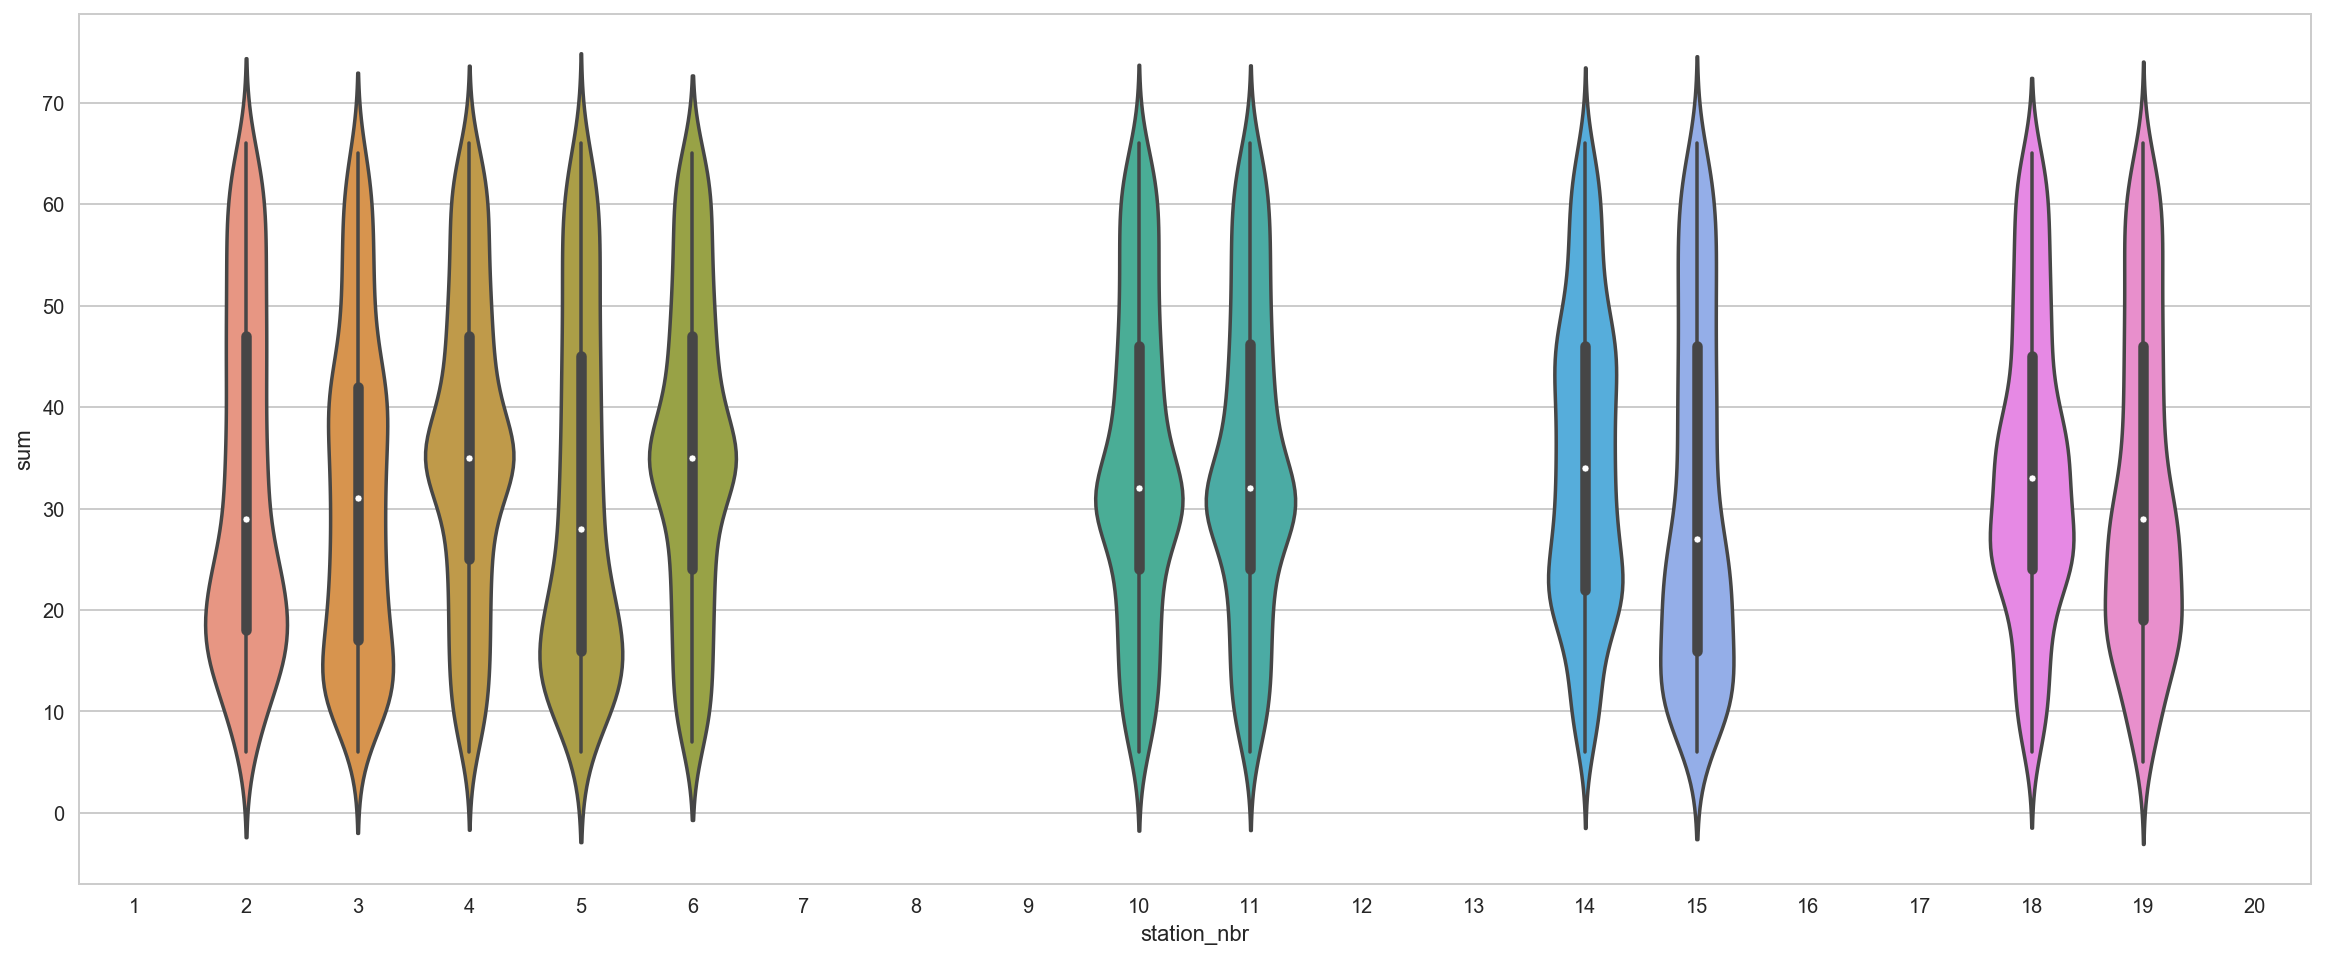

In [59]:
plt.figure(figsize=(20,8))
sns.violinplot(x="station_nbr", y="sum", data=df_sunrise, jitter=True)
plt.show()

In [61]:
corrmat = df_sunrise.corr()
corrmat

,station_nbr,year,month,day,sunrise_hour,sunrise_min,sum
station_nbr,1.000000,-0.008247,-0.006137,0.000027,-0.018768,-0.000488,-0.001603
year,-0.008247,1.000000,-0.124890,-0.002048,-0.151405,0.014339,0.005596
month,-0.006137,-0.124890,1.000000,0.010619,-0.018026,-0.002197,-0.003293
day,0.000027,-0.002048,0.010619,1.000000,-0.011100,0.003075,0.002462
sunrise_hour,-0.018768,-0.151405,-0.018026,-0.011100,1.000000,-0.264120,-0.208739
sunrise_min,-0.000488,0.014339,-0.002197,0.003075,-0.264120,1.000000,0.998376
sum,-0.001603,0.005596,-0.003293,0.002462,-0.208739,0.998376,1.000000


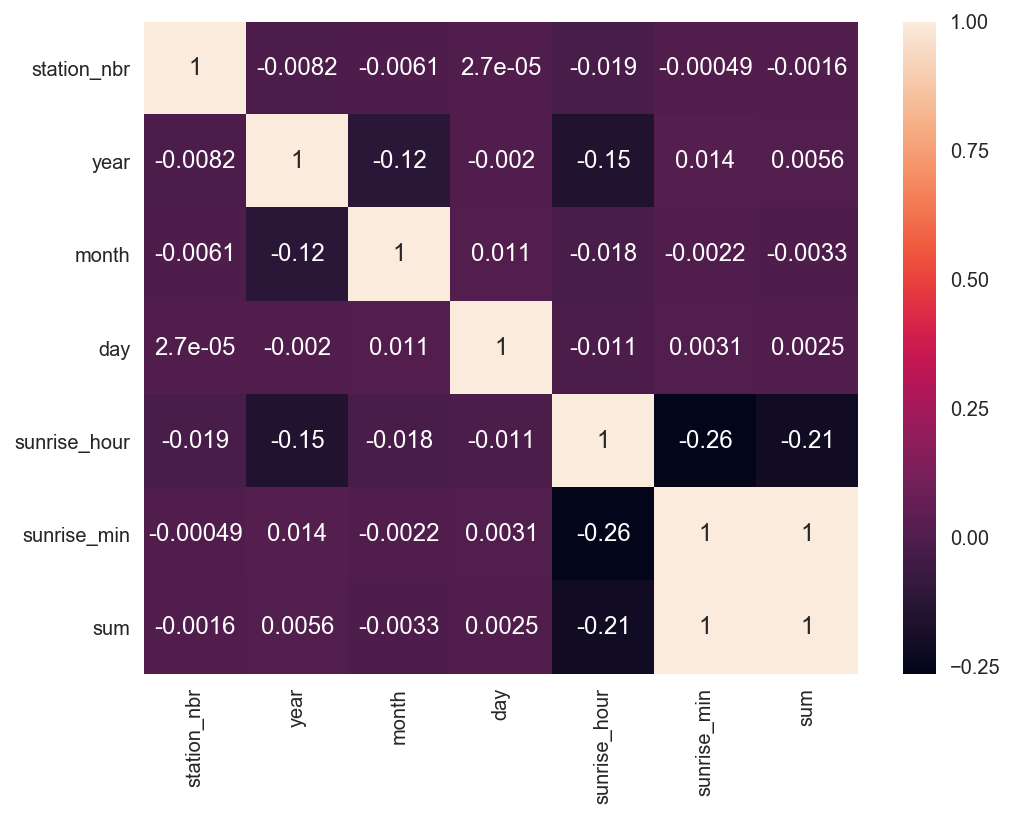

In [62]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, annot=True)